<a href="https://colab.research.google.com/github/leob03/biological_networks/blob/main/PythonExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
# load the data
df = pd.read_csv("D.csv", header=None)

columnNames = [
    'Human Languages',
    'Linear algebra',
    'Singular value decomposition',
    'Graph theory',
    'Machine learning',
    'Dimension reduction',
    'Dynamical systems',
    'Control theory',
    'Topological data analysis',
    'Tensors and hypergraphs',
    'Data visualization',
    'Working with real data',
    'Programming (MATLAB/Python)',
    'LaTeX',
    'Linear algebra fundamentals',
    'Computational linear algebra',
    'Eigenvalues and eigenvectors',
    'Differential equations',
    'MATLAB programming',
    'Python programming',
    'R programming',
    'LaTeX',
    'Working with real-world data',
    'Data visualization',
]

df.columns = columnNames
df.head()

,Human Languages,Linear algebra,Singular value decomposition,Graph theory,Machine learning,Dimension reduction,Dynamical systems,Control theory,Topological data analysis,Tensors and hypergraphs,...,Linear algebra fundamentals,Computational linear algebra,Eigenvalues and eigenvectors,Differential equations,MATLAB programming,Python programming,R programming,LaTeX,Working with real-world data,Data visualization
0,1,5,5,5,5,5,5,5,5,5,...,1,1,2,3,2,2,1,1,2,3
1,2,3,5,5,3,4,5,5,4,5,...,5,5,5,5,5,4,4,1,4,4
2,4,4,3,5,5,5,4,3,5,3,...,4,3,4,2,3,5,5,3,5,4
3,3,3,2,4,4,5,5,4,3,3,...,4,3,3,3,4,3,3,1,3,4
4,2,1,1,3,4,3,3,3,4,3,...,1,1,3,2,5,5,1,2,4,4


In [14]:
# the matrix has 85 rows and 24 columns, the columns are the expertise/interest in a subject and the
# rows are the student responses
print(df.shape)

(85, 24)


In [15]:
# take a quick peek at the data
df.describe()

,Human Languages,Linear algebra,Singular value decomposition,Graph theory,Machine learning,Dimension reduction,Dynamical systems,Control theory,Topological data analysis,Tensors and hypergraphs,...,Linear algebra fundamentals,Computational linear algebra,Eigenvalues and eigenvectors,Differential equations,MATLAB programming,Python programming,R programming,LaTeX,Working with real-world data,Data visualization
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.905882,3.341176,3.000000,3.423529,3.976471,3.447059,3.647059,3.376471,3.529412,3.341176,...,2.870588,2.294118,2.941176,3.141176,2.905882,2.741176,2.400000,1.858824,3.094118,2.858824
std,0.765686,1.097106,1.035098,1.106006,0.975613,1.006004,1.031710,1.068783,1.018732,1.052807,...,1.222685,1.078177,1.050543,1.001819,1.181439,1.355350,1.355764,1.292404,1.097872,1.059570
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
# print the rank of the matrix
rank = np.linalg.matrix_rank(df)
print(rank)

24


In [17]:
# compute the covariance matrix. note: there are two,
# one is how students compare to one another and the other is how
# the questions compare to one another. For this, we will look at how students compare
C = np.cov(df)
print(C.shape)

(85, 85)


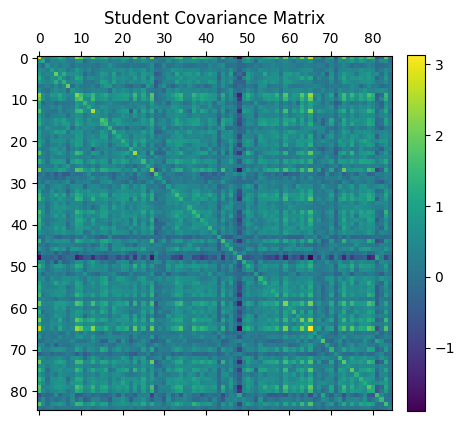

In [18]:
# some plotting parameters to make the image pretty
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 5, 5

# plot the matrix for fun
plt.matshow(C)
# make colorbar the same size as graph
plt.colorbar(fraction=0.046, pad=0.04)
_ = plt.title('Student Covariance Matrix')

In [19]:
# note, this is not efficient, but it does show how each row/column
# of C are related

# create an empty matrix
n = len(df)
Cmanual = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        # get the ith and jth rows (student) of the matrix
        rowI = df.iloc[[i]].astype(float)
        rowJ = df.iloc[[j]].astype(float)

        # compute covariance using numpy
        covIJ = np.cov(rowI, rowJ)

        # note that covIJ is a 2x2 matrix with identical values
        # we just need one of them
        ij = covIJ[0][1]

        # save the value to the result matrix
        # since the matrix is symmetric, C_ij = C_ji
        Cmanual[i, j] = ij
        Cmanual[j, i] = ij

print(Cmanual.shape)

(85, 85)


In [20]:
# are the manual and the numpy covariance the same?
sameTest = np.allclose(C, Cmanual)
print(sameTest)

True


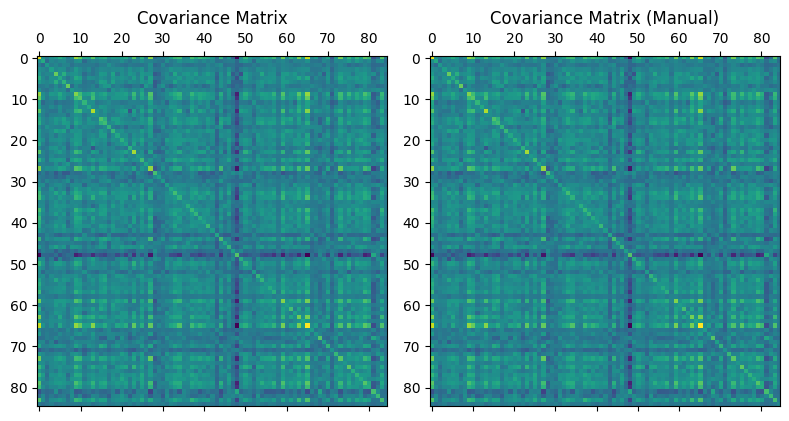

In [21]:
# we can also plot them side by side
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 8, 8

fig, axs = plt.subplots(1, 2)
axs = axs.ravel()

# plot the original matrix (numpy) on the left
axs[0].matshow(C)
axs[0].set_title('Covariance Matrix')

# plot the manual matrix on the right
axs[1].matshow(Cmanual)
axs[1].set_title('Covariance Matrix (Manual)')

plt.tight_layout()

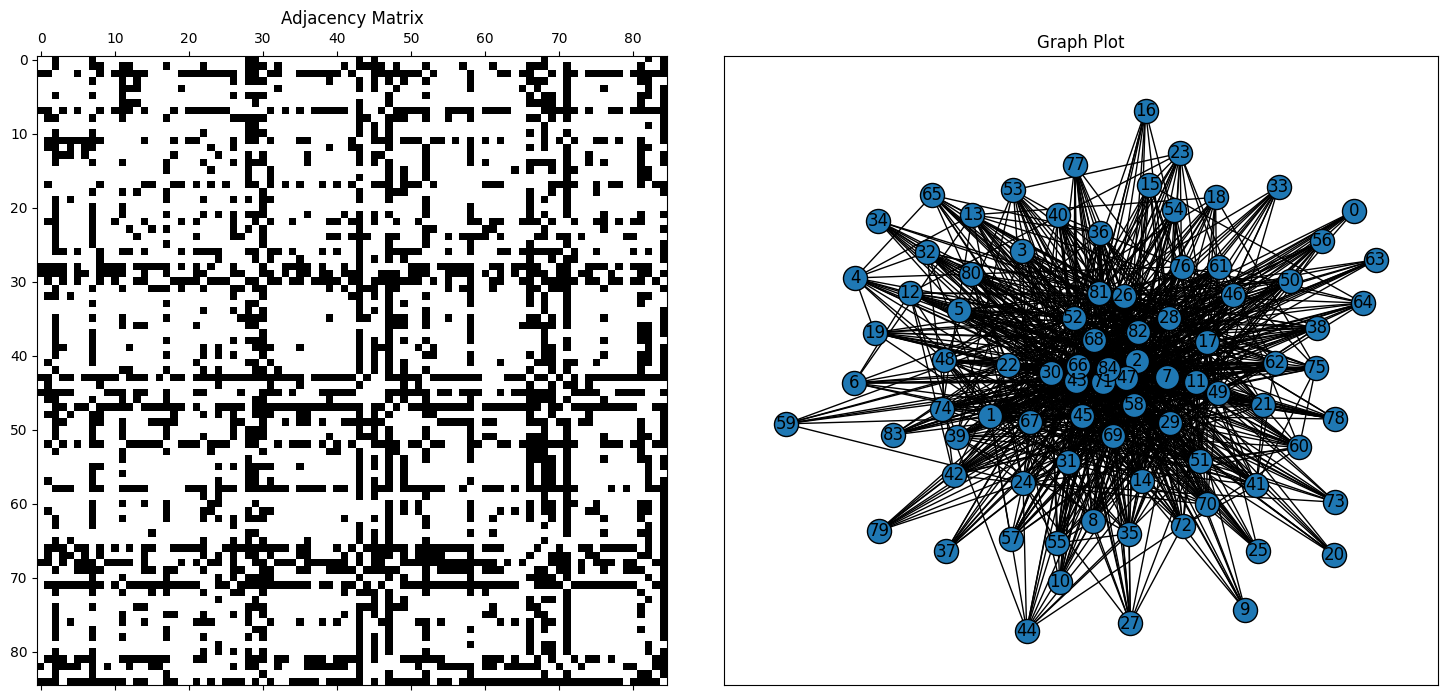

In [39]:
# we can choose a threshold to make the A matrix, I suggest playing around with this value
t = 0.25

# for this example, I will treat large and small covariances the same, but this need not be the case
# Any students who have small covariances will be assumed to have an interaction, otherwise not
# this assumption allows me to use the absolute value of the covariance matrix for thresholding
A = np.where(np.abs(C) < t, 1, 0)


# next we convert to a networkx object, which is a sweet network package
G = nx.from_numpy_array(A)

# some plotting parameters the make the image pretty
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 15, 7

# plot the matrix and the graph
fig, axs = plt.subplots(1, 2)
axs = axs.ravel()

axs[0].spy(A)
_ = axs[0].set_title('Adjacency Matrix')

nx.draw_networkx(G,
                 nx.spring_layout(G),
                 with_labels = True,
                 edgecolors = 'black',
                 node_size = 300,
                 ax=axs[1])

_ = axs[1].set_title('Graph Plot')

plt.tight_layout()

[ 7 22 45 16 13 16 12 42 21  5 13 32 13 15 18 11  6 33  9 10  5 21 30 11
 26  9 32 11 38 43 42 21 15 11  9 18 17  8 14 17 17 15 18 56 10 46 15 59
 20 30 13 21 43 12 16 12  8 10 40  7 13 21 18  7  8 10 48 27 46 37 16 58
 18 11 10 15 19 13  7  7 14 38 36 12 56]


Text(0.5, 1.0, 'Degree Distribution')

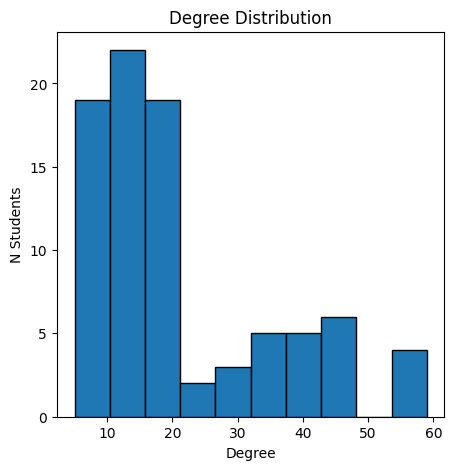

In [38]:
# we can compute the degree distribution from the A matrix

# take the sum over the rows of A
deg = A.sum(axis=0)
print(deg)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 5, 5

_ = plt.hist(deg,
             edgecolor='k')

plt.xlabel('Degree')
plt.ylabel('N Students')
plt.title('Degree Distribution')